## Weather Prediction

**Anggota Kelompok**

202010370311212 – Deva Putra Setya Pratama

**DATA MINING TASK**

Data mining task yang akan digunakan adalah klasifikasi. Klasifikasi pada dataset Denpasar, Bali Historical Weather Data adalah untuk mengelompokkan data cuaca berdasarkan berbagai atribut dan variabel cuaca yang terdapat dalam dataset tersebut. Dengan menggunakan algoritma klasifikasi, seperti Random Forest Classifier,  Decision Tree, Naive Bayes, atau Support Vector Machines (SVM), tujuan utama dari fungsi ini adalah untuk mengidentifikasi pola-pola atau kategori-kategori tertentu dalam data cuaca yang dapat digunakan untuk mengklasifikasikan cuaca dalam kelompok atau kategori yang sudah ditentukan.

## Exploratory Data Analysis (EDA)



**Melakukan import untuk semua library yang akan digunakan pada mini project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sb

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cornflake15/denpasarbalihistoricalweatherdata

 68% 5.00M/7.32M [00:00<00:00, 50.7MB/s]
100% 7.32M/7.32M [00:00<00:00, 68.2MB/s]


In [ ]:
!unzip /content/denpasarbalihistoricalweatherdata.zip

Archive:  /content/denpasarbalihistoricalweatherdata.zip
  inflating: openweatherdata-denpasar-1990-2020.csv  
  inflating: openweatherdata-denpasar-1990-2020v0.1.csv  


In [ ]:
# Membaca file
df = pd.read_csv('openweatherdata-denpasar-1990-2020.csv')

# Menampilkan 5 data urutan paling atas
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,631152000,1990-01-01 00:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,631155600,1990-01-01 01:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,631159200,1990-01-01 02:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,631162800,1990-01-01 03:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,631166400,1990-01-01 04:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d


## Data Preprocessing

**Feature Selection (Pemilihan fitur) dan menghapus fitur yang tidak digunakan**

In [ ]:
#Memilihi fitur-fitur yang akan digunakan 
usecols = ['temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all', 'weather_main']

#Menghapus fitur yang tidak digunakan
df = pd.DataFrame(df, columns=usecols)

#Mengecek nulla value
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")


Rows and Columns:
(264924, 7)

Null Values %:
temp            0.0
pressure        0.0
humidity        0.0
wind_speed      0.0
wind_deg        0.0
clouds_all      0.0
weather_main    0.0
dtype: float64


**Drop Duplicated Column**

In [ ]:
#Menampilkan jumlah data sebelum dilakukan drop pada data duplikat
print(f"\nRows and Columns:\n{df.shape}")


Rows and Columns:
(264924, 7)


In [ ]:
#Menghapus data yang duplikat
df = df.drop_duplicates()
df

,temp,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main
0,25.82,1010.0,86,1.36,225,98,Rain
1,26.20,1011.0,84,2.09,247,91,Rain
2,26.45,1011.0,84,2.44,262,94,Rain
3,26.80,1011.0,82,2.29,271,94,Rain
4,27.04,1010.0,82,1.71,274,76,Clouds
...,...,...,...,...,...,...,...
264919,27.00,1007.0,94,4.10,300,75,Clouds
264920,27.00,1007.0,94,5.70,300,75,Clouds
264921,28.00,1007.0,83,6.70,290,75,Clouds
264922,28.00,1007.0,83,6.20,290,40,Clouds


In [ ]:
#Menampilkan jumlah data sesudah dilakukan drop pada data duplikat
print(f"\nRows and Columns:\n{df.shape}")


Rows and Columns:
(232767, 7)


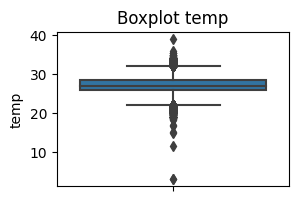

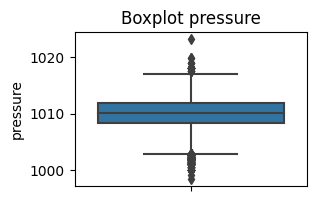

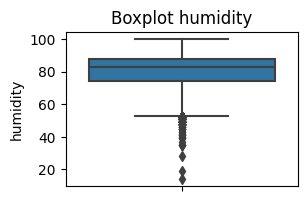

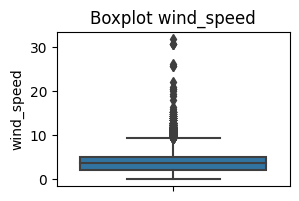

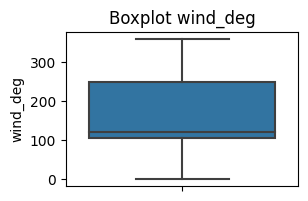

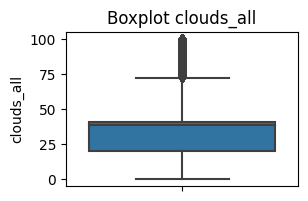

In [ ]:
# Daftar fitur yang kemungkinan memiliki data outlier
fitur_list = ['temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all']
# Menampilkan boxplot

for fitur in fitur_list:
    fig, ax = plt.subplots(figsize=(3, 2))
    sb.boxplot(data=df, y=fitur, ax=ax)
    plt.title(f'Boxplot {fitur}')
    plt.show()

**REMOVE OUTLIER**

In [ ]:
#Jumlah data sebelum data outlier dihapus
print(f"\nRows and Columns:\n{df.shape}")


Rows and Columns:
(232767, 7)


In [ ]:
#memilih fitur yang akan dihapus data outliernya
fitur_list = ['temp', 'pressure', 'humidity', 'wind_speed', 'clouds_all']

# Menghapus outlier menggunakan metode IQR
for fitur in fitur_list:
    Q1 = df[fitur].quantile(0.25)
    Q3 = df[fitur].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[fitur] >= lower_bound) & (df[fitur] <= upper_bound)]

In [ ]:
#Jumlah data setelah data outlier dihapus
print(f"\nRows and Columns:\n{df.shape}")


Rows and Columns:
(181418, 7)


**Data Reduction**

Pada tahap ini kami melakukan pemilihan kategori target yang nantinya akan diprekdiksi, target kategori utama kami adalah Rain, Clouds, Thunderstorm dan Clear. Karena target kategori lain memiliki data yang sangat jelek, maka kami memutuskan untuk menggunakan 4 target kategori tersebut. Penyebabnya adalah beberapa target kategori merupakn cuaca yang sangat jarang atau bahkan hampir tidak pernah terjadi di Indonesia. Oleh karena itu pada tahap ini akan dilakukan penghapusan target kategori yang tidak diperlukan untuk keperluan data balancing.

In [ ]:
#Total masing-masing target kategori 
df.weather_main.value_counts()

Clouds          159769
Rain             14367
Clear             3872
Thunderstorm      2845
Haze               441
Mist                62
Smoke               28
Fog                 15
Dust                 5
Tornado              4
Ash                  4
Squall               3
Drizzle              3
Name: weather_main, dtype: int64

In [ ]:
#Menghapus target kategori selain 4 target kategori utama
allowed_categories = ['Rain', 'Clouds', 'Clear', 'Thunderstorm']
data_cleaned = df[df['weather_main'].isin(allowed_categories)]
df = data_cleaned

In [ ]:
# UPSAMPLING
from imblearn.over_sampling import SMOTE

X = df.drop('weather_main', axis=1)  # Fitur
y = df['weather_main']  # Target

# Menggunakan SMOTE untuk melakukan oversampling dengan target jumlah sampel pada kategori 'Clear' dan 'Thunderstorm'
smote = SMOTE(sampling_strategy={'Clear': 13000, 'Thunderstorm': 13000})

# Melakukan oversampling pada data menggunakan SMOTE
X_upsampled, y_upsampled = smote.fit_resample(X, y)

In [ ]:
# Menggabungkan fitur dan target yang telah di-oversampling
upsampled_data = pd.concat([X_upsampled, y_upsampled], axis=1)

# Memperbarui dataframe utama dengan data yang telah di-oversampling
df = upsampled_data

In [ ]:
# DOWNSAMPLING

# Menghitung jumlah sampel dalam setiap kategori
kategori_counts = df['weather_main'].value_counts()

# Menentukan jumlah sampel yang diinginkan setelah downsampling
desired_samples = 13000

# Mendapatkan kategori dengan jumlah sampel terbanyak (kelas mayoritas)
kelas_mayoritas = kategori_counts.idxmax()

# Inisialisasi DataFrame kosong untuk menyimpan hasil downsampling
downsampled_data = pd.DataFrame()

# Melakukan downsampling pada setiap kategori
for kategori in kategori_counts.index:
    # Mengambil sampel acak sebanyak desired_samples dari kategori saat ini
    samples = df[df['weather_main'] == kategori].sample(n=desired_samples, random_state=42)
    # Menambahkan sampel ke DataFrame hasil downsampling
    downsampled_data = pd.concat([downsampled_data, samples])

df = downsampled_data

In [ ]:
#Total target kategori utama
df.weather_main.value_counts()

Clouds          13000
Rain            13000
Thunderstorm    13000
Clear           13000
Name: weather_main, dtype: int64

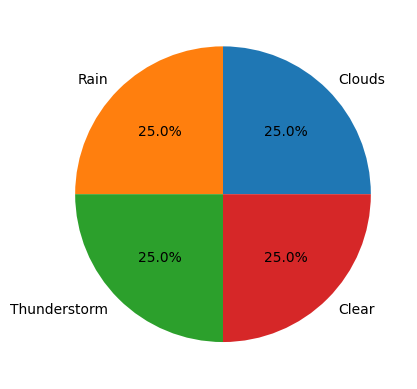

In [ ]:
#Menampilkan persentasi target kategori dengan pie chart
plt.pie(df['weather_main'].value_counts().values,
        labels = df['weather_main'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [ ]:
#Menampilkan rata-rata fitur pada setiap target kategori
df.groupby('weather_main').mean()

,temp,pressure,humidity,wind_speed,wind_deg,clouds_all
weather_main,,,,,,
Clear,26.692044,1010.604620,79.561692,4.023172,134.399077,4.643538
Clouds,27.451605,1010.139500,79.750154,3.593657,150.351231,27.832462
Rain,26.320085,1009.717738,86.968077,3.703582,174.648000,38.013846
Thunderstorm,27.126639,1008.535856,85.938308,2.809393,179.334769,33.020615


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Memilih fitur dan target
features = ['temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all']
target = 'weather_main'
X = df[features]
y = df[target]

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalisasi menggunakan Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Membagi data test dan trainnya
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Membuat model Random Forest Classifier
rfc_classifier = RandomForestClassifier()
rfc_classifier.fit(X_train, y_train)
rfc_predictions = rfc_classifier.predict(X_test)

# Membuat evaluasi model
rfc_score = accuracy_score(y_test, rfc_predictions)
precision_rfc = precision_score(y_test, rfc_predictions, average='macro')
recall_rfc = recall_score(y_test, rfc_predictions, average='macro')
f1_rfc = f1_score(y_test, rfc_predictions, average='macro')

In [ ]:
# Menampilkan evaluasi dari Model Random Forest Classifier
print("Random Forest Classifier:")
print("Accuracy:", rfc_score)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 Score:", f1_rfc)


Random Forest Classifier:
Accuracy: 0.8176923076923077
Precision: 0.8186679099386301
Recall: 0.8185544118362911
F1 Score: 0.8183691277385566


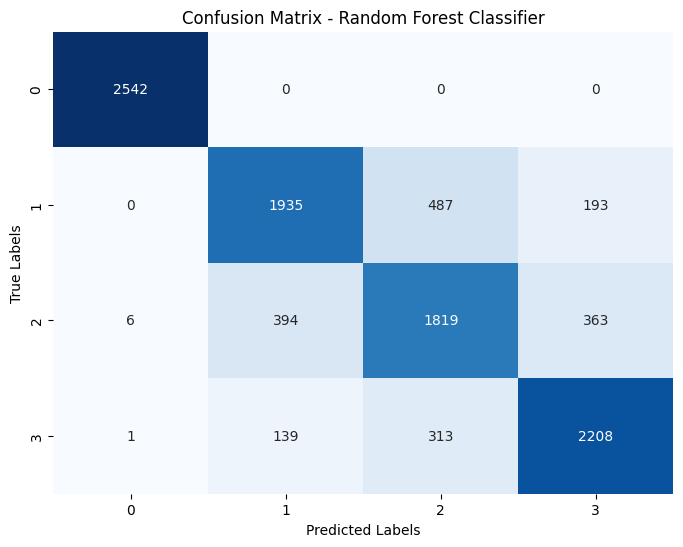

In [ ]:
from sklearn.metrics import confusion_matrix

#Menampilkan confussion matrix dari Model Random Forest Classifier
cm_rfc = confusion_matrix(y_test, rfc_predictions)
plt.figure(figsize=(8, 6))
sb.heatmap(cm_rfc, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Evaluasi model Random Forest Classifier
print("Evaluation - Random Forest Classifier:")
print(classification_report(y_test, rfc_predictions))
print()

Evaluation - Random Forest Classifier:
              precision    recall  f1-score   support

       Clear       1.00      1.00      1.00      2542
      Clouds       0.78      0.74      0.76      2615
        Rain       0.69      0.70      0.70      2582
Thunderstorm       0.80      0.83      0.81      2661

    accuracy                           0.82     10400
   macro avg       0.82      0.82      0.82     10400
weighted avg       0.82      0.82      0.82     10400




## Decission Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Membuat model Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Membuat evaluasi model
dt_score = accuracy_score(y_test, dt_predictions)
precision_dt = precision_score(y_test, dt_predictions, average='macro')
recall_dt = recall_score(y_test, dt_predictions, average='macro')
f1_dt = f1_score(y_test, dt_predictions, average='macro')

In [ ]:
#Menampilkan evaluasi dari Model Decission Tree
print("Decission Tree:")
print("Accuracy:", dt_score)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Decission Tree:
Accuracy: 0.7497115384615385
Precision: 0.7522562125298231
Recall: 0.7511705685931493
F1 Score: 0.7515829750858986


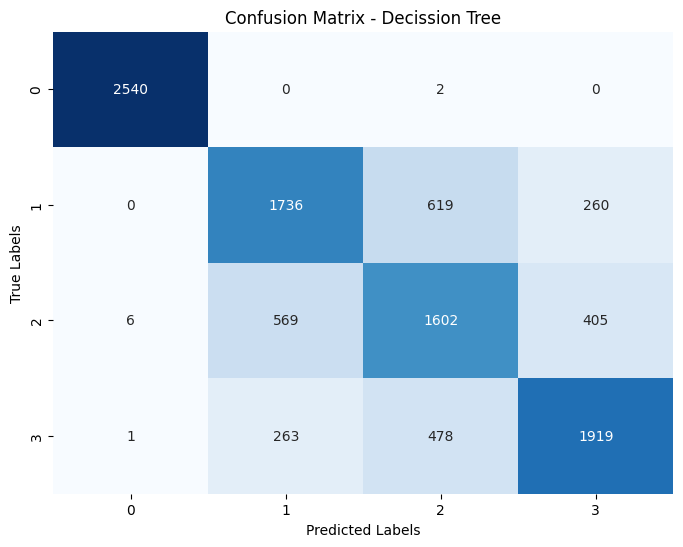

In [ ]:
#Menampilkan confussion matrix dari Model Decission Tree
cm_dt = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sb.heatmap(cm_dt, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Decission Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Evaluasi model Decision Tree
print("Evaluation - Decision Tree:")
print(classification_report(y_test, dt_predictions))
print()

Evaluation - Decision Tree:
              precision    recall  f1-score   support

       Clear       1.00      1.00      1.00      2542
      Clouds       0.68      0.66      0.67      2615
        Rain       0.59      0.62      0.61      2582
Thunderstorm       0.74      0.72      0.73      2661

    accuracy                           0.75     10400
   macro avg       0.75      0.75      0.75     10400
weighted avg       0.75      0.75      0.75     10400




## Gaussian Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Membuat model Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# Membuat evaluasi model
nb_score = accuracy_score(y_test, nb_predictions)
precision_nb = precision_score(y_test, nb_predictions, average='macro')
recall_nb = recall_score(y_test, nb_predictions, average='macro')
f1_nb = f1_score(y_test, nb_predictions, average='macro')

In [ ]:
# Menampilkan evaluasi dari Model Naive Bayes
print("Naive Bayes Evaluation:")
print("Accuracy:", nb_score)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

Naive Bayes Evaluation:
Accuracy: 0.6745192307692308
Precision: 0.6839820253581322
Recall: 0.6764549493926527
F1 Score: 0.6785514743962049


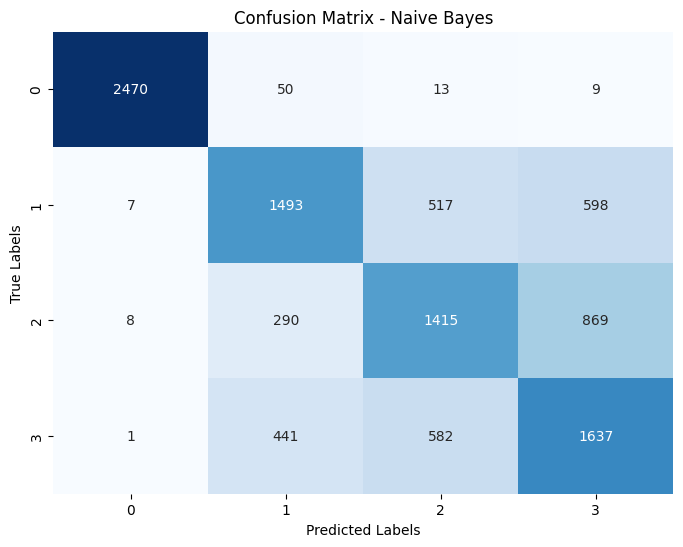

In [ ]:
# Menampilkan confussion matrix dari Model Naive Bayes
cm_nb = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(8, 6))
sb.heatmap(cm_nb, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Evaluasi model Naive Bayes
print("Evaluation - Naive Bayes:")
print(classification_report(y_test, nb_predictions))
print()

Evaluation - Naive Bayes:
              precision    recall  f1-score   support

       Clear       0.99      0.97      0.98      2542
      Clouds       0.66      0.57      0.61      2615
        Rain       0.56      0.55      0.55      2582
Thunderstorm       0.53      0.62      0.57      2661

    accuracy                           0.67     10400
   macro avg       0.68      0.68      0.68     10400
weighted avg       0.68      0.67      0.68     10400




## Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC
# Membuat model Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Membuat evaluasi model
svm_score = accuracy_score(y_test, svm_predictions)
precision_svm = precision_score(y_test, svm_predictions, average='macro')
recall_svm = recall_score(y_test, svm_predictions, average='macro')
f1_svm = f1_score(y_test, svm_predictions, average='macro')

In [ ]:
# Menampilkan evaluasi dari Model Support Vector Machine
print("Support Vector Machine:")
print("Accuracy:", svm_score)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Support Vector Machine:
Accuracy: 0.7158653846153846
Precision: 0.7287130795379584
Recall: 0.7170119157595376
F1 Score: 0.7157848111141967


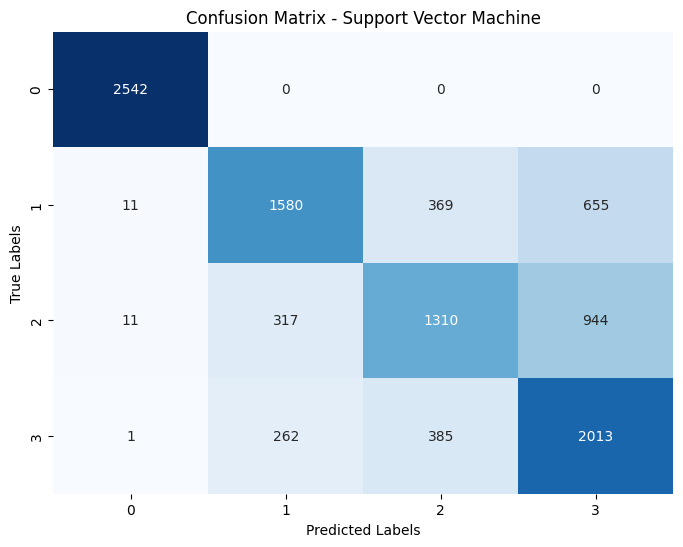

In [ ]:
cm_svm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sb.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Evaluasi model Support Vector Machine
print("Evaluation - Support Vector Machine:")
print(classification_report(y_test, svm_predictions))
print()

Evaluation - Support Vector Machine:
              precision    recall  f1-score   support

       Clear       0.99      1.00      1.00      2542
      Clouds       0.73      0.60      0.66      2615
        Rain       0.63      0.51      0.56      2582
Thunderstorm       0.56      0.76      0.64      2661

    accuracy                           0.72     10400
   macro avg       0.73      0.72      0.72     10400
weighted avg       0.73      0.72      0.71     10400




## Perbandingan akurasi terbaik dari 4 model

In [ ]:
# Menampilkan skor masing-masing model
print("Random Forest Score:", rfc_score)
print("Decision Tree Score:", dt_score)
print("Naive Bayes Score:", nb_score)
print("SVM Score:", svm_score)

Random Forest Score: 0.8176923076923077
Decision Tree Score: 0.7497115384615385
Naive Bayes Score: 0.6745192307692308
SVM Score: 0.7158653846153846


## Percobaan prediksi menggunakan masing-masing model

In [ ]:
# Contoh prediksi menggunakan model Decision Tree
example_data = [[27.04, 1010, 82, 1.71, 274, 76]]
rfc_prediction_example = rfc_classifier.predict(example_data)
print("Prediction (Random Forest Classifier):", rfc_prediction_example)

Prediction (Random Forest Classifier): ['Rain']


In [ ]:
# Contoh prediksi menggunakan model Decision Tree
example_data = [[27.04, 1010, 82, 1.71, 274, 76]]
dt_prediction_example = dt_classifier.predict(example_data)
print("Prediction (Decission Tree):", dt_prediction_example)

Prediction (Decission Tree): ['Clouds']


In [ ]:
# Contoh prediksi menggunakan model Decision Tree
example_data = [[27.04, 1010, 82, 1.71, 274, 76]]
nb_prediction_example = nb_classifier.predict(example_data)
print("Prediction (Naive Bayes):", nb_prediction_example)

Prediction (Naive Bayes): ['Rain']


In [ ]:
# Contoh prediksi menggunakan model Decision Tree
example_data = [[27.04, 1010, 82, 1.71, 274, 76]]
svm_prediction_example = svm_classifier.predict(example_data)
print("Prediction (Support Vector Machine):", svm_prediction_example)

Prediction (Support Vector Machine): ['Clouds']
